In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# set defaults
plt.style.use('seaborn-white')   # seaborn custom plot style
plt.rc('figure', dpi=100, figsize=(7, 5))   # set default size/resolution
plt.rc('font', size=12)   # font size

tips = sns.load_dataset('tips')

# Examples

Outline

* Grid Search / Classification.
* Regression with feature selection (multicollinearity)
* Text model (bag of words /  tfidf).

### Example: Predicting Diabetes

* Given health measurements, can you predict whether an individual will develop diabetes?
* Classification of health outcomes: 0=NO DIABETES and 1=DIABETES
* We will use 'accuracy' to evaluate the model (not necessarily the best choice!)

In [2]:
diabetes = pd.read_csv('data/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes[['Pregnancies','Insulin', 'BMI', 'Glucose', 'Outcome']].describe()

,Pregnancies,Insulin,BMI,Glucose,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,79.799479,31.992578,120.894531,0.348958
std,3.369578,115.244002,7.884160,31.972618,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,27.300000,99.000000,0.000000
50%,3.000000,30.500000,32.000000,117.000000,0.000000
75%,6.000000,127.250000,36.600000,140.250000,1.000000
max,17.000000,846.000000,67.100000,199.000000,1.000000


In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [5]:
# features
X = diabetes.drop('Outcome', axis=1)
# outcome
y = diabetes.Outcome

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12) # 70% training and 30% test

In [7]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [8]:
# proportion for correct values
clf.score(X_train, y_train)

1.0

In [9]:
clf.score(X_test, y_test)

0.6926406926406926

In [10]:
# look at the importance of each feature in our tree model
# _: attributes created when model is fit. Contains info that it learned from the data
dict(zip(X.columns, clf.feature_importances_))

{'Pregnancies': 0.061665104597069,
 'Glucose': 0.3780521140770269,
 'BloodPressure': 0.06184505460669227,
 'SkinThickness': 0.0709675137590606,
 'Insulin': 0.03588878290088145,
 'BMI': 0.14344925247279505,
 'DiabetesPedigreeFunction': 0.11478363630808794,
 'Age': 0.1333485412783868}

In [11]:
# maximum depth
clf.tree_.max_depth

15

In [12]:
# node count
clf.tree_.node_count

211

In [13]:
clf_small = DecisionTreeClassifier(max_depth=4)
clf_small.fit(X_train, y_train)
clf_small.score(X_train, y_train)

0.7858472998137802

In [14]:
clf_small.score(X_test, y_test)

0.7489177489177489

In [15]:
from util import tree_to_code

In [16]:
tree_to_code(clf_small, X.columns)

def tree(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age):
  if Glucose <= 144.5:
    if Glucose <= 101.5:
      if BMI <= 34.10000038146973:
        if Insulin <= 227.0:
          return [[104.   1.]]
        else:  # if Insulin > 227.0
          return [[1. 1.]]
      else:  # if BMI > 34.10000038146973
        if Age <= 51.0:
          return [[37.  8.]]
        else:  # if Age > 51.0
          return [[0. 2.]]
    else:  # if Glucose > 101.5
      if BMI <= 26.34999942779541:
        if Insulin <= 49.0:
          return [[28.  4.]]
        else:  # if Insulin > 49.0
          return [[27.  0.]]
      else:  # if BMI > 26.34999942779541
        if Age <= 29.5:
          return [[73. 26.]]
        else:  # if Age > 29.5
          return [[53. 55.]]
  else:  # if Glucose > 144.5
    if Glucose <= 165.5:
      if Age <= 24.5:
        return [[5. 0.]]
      else:  # if Age > 24.5
        if BMI <= 23.5:
          return [[2. 0.]]
        e

In [17]:
tree_to_code(clf, X.columns)

def tree(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age):
  if Glucose <= 144.5:
    if Glucose <= 101.5:
      if BMI <= 34.10000038146973:
        if Pregnancies <= 11.5:
          if BloodPressure <= 24.0:
            if BMI <= 26.850000381469727:
              return [[6. 0.]]
            else:  # if BMI > 26.850000381469727
              return [[0. 1.]]
          else:  # if BloodPressure > 24.0
            return [[98.  0.]]
        else:  # if Pregnancies > 11.5
          if Glucose <= 84.0:
            return [[1. 0.]]
          else:  # if Glucose > 84.0
            return [[0. 1.]]
      else:  # if BMI > 34.10000038146973
        if Age <= 51.0:
          if DiabetesPedigreeFunction <= 0.48349998891353607:
            if Insulin <= 170.0:
              if BloodPressure <= 84.5:
                return [[23.  0.]]
              else:  # if BloodPressure > 84.5
                if Insulin <= 38.0:
                  return [[0. 1.

## How to select model parameters?

* Each combination of model parameters requires: 
    - fitting a model; evaluating the model; comparing performance.
* This leads to training perhaps *thousands* of models!
    - How to do this in a computationally feasible way?
    - How to keep your code clean to keep track?

## How to select model parameters?

* How to select in a computationally feasible way?
    - Trying every combination ('grid search') works for smaller data/models.
    - Sampling possible combinations of parameters using probabilistic reasoning.
    
* How to keep your code clean to keep track?
    - The `sklearn.model_selection` package.

### Example: parameter search for diabetes prediction

* Decision tree has possible parameters:
    - `max_depth`, `min_samples_split`, `min_samples_leaf`
    - plus others we won't consider
    
* We will use `GridSearchCV` to explore parameter combinations using cross-validation

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [21]:
# How many combinations are there to search through?

parameters = {
    'max_depth': [2,3,4,5,7,10,13,15,18,None], 
    'min_samples_split':[2,3,5,7,10,15,20],
    'min_samples_leaf':[2,3,5,7,10,15,20]
}

In [22]:
[len(v) for v in parameters.values()]

[10, 7, 7]

In [23]:
clf = GridSearchCV(DecisionTreeClassifier(), parameters, cv = 5)

In [24]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 7, 10, 13, 15, 18, None],
                         'min_samples_leaf': [2, 3, 5, 7, 10, 15, 20],
                         'min_samples_split': [2, 3, 5, 7, 10, 15, 20]})

In [25]:
clf#.best_params_

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 7, 10, 13, 15, 18, None],
                         'min_samples_leaf': [2, 3, 5, 7, 10, 15, 20],
                         'min_samples_split': [2, 3, 5, 7, 10, 15, 20]})

In [26]:
# number of competing models
len(clf.cv_results_['mean_test_score'])

490

In [27]:
# total number of models fit = (# of param combos) x (5 folds)
490 * 5

2450

### Was the "best parameter" the only "best choice"

* Plot the histogram of scores across all models
* Many high values implies many good model choices
    - Robust model
* Plot the histogram of standard deviations for the CVs
    - many small numbers imply most parameters give stable models.

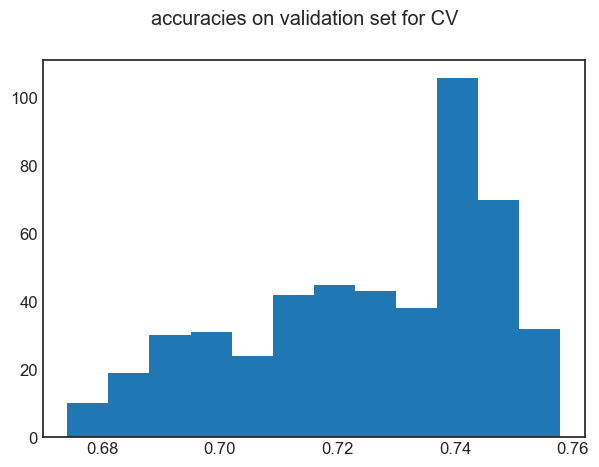

In [28]:
# Each x-value is the score of a different model,
# corresponding to a choice of parameters
#
plt.hist(clf.cv_results_['mean_test_score'], bins=12)
plt.suptitle('accuracies on validation set for CV');

In [29]:
# if many models were good and had high accuracy => good
# you do not want a model that really depends on parameter choices => likely, overfitting
# if a lot of good model choices: you are learning real patterns in the data 

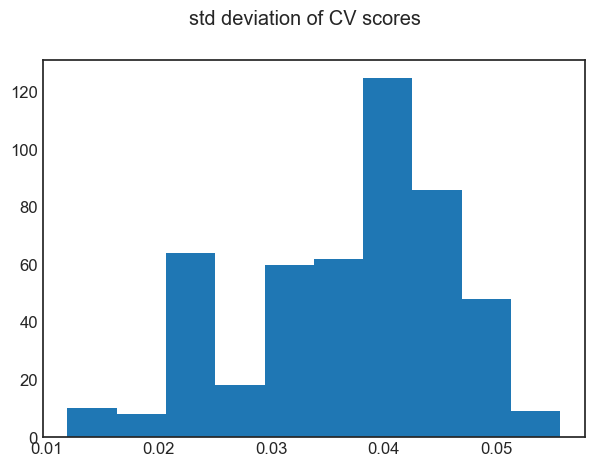

In [30]:
# Each x-value is the standard deviation for the 5-fold CV for a single model
# corresponding to a choice of parameters
plt.hist(clf.cv_results_['std_test_score'])
plt.suptitle('std deviation of CV scores');

In [31]:
# if we have a high std of accuracy: model varied a lot, depending on how 
# you split your data.
# If std is low, then you are getting the same model performace 
# ^^ tells you what you should expect for fluctuation in your accuracy above


In [32]:
clf_best = clf.best_estimator_

In [33]:
clf.score(X_train, y_train)

0.7877094972067039

In [34]:
clf.score(X_test, y_test)

0.70995670995671

In [35]:
tree_to_code(clf_best, X.columns)

def tree(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age):
  if Glucose <= 144.5:
    if Age <= 28.5:
      if BMI <= 30.449999809265137:
        if Pregnancies <= 2.5:
          return [[91.  0.]]
        else:  # if Pregnancies > 2.5
          return [[24.  4.]]
      else:  # if BMI > 30.449999809265137
        if Glucose <= 127.5:
          return [[82. 17.]]
        else:  # if Glucose > 127.5
          return [[10.  9.]]
    else:  # if Age > 28.5
      if BMI <= 27.34999942779541:
        if DiabetesPedigreeFunction <= 0.2645000070333481:
          return [[14.  3.]]
        else:  # if DiabetesPedigreeFunction > 0.2645000070333481
          return [[22.  0.]]
      else:  # if BMI > 27.34999942779541
        if Glucose <= 99.5:
          return [[28.  6.]]
        else:  # if Glucose > 99.5
          return [[50. 66.]]
  else:  # if Glucose > 144.5
    if Glucose <= 154.5:
      return [[12. 16.]]
    else:  # if Glucose > 154.5
 

# Multicollinearity

## Regression with Multicollinearity

* Linear regression with (perfectly) correlated features leads to high variance (unstable) models.
* When the dataset ~1-dimensional in 3-dim space, fitting a plane is under-determined.
* Regression gives you a plane of best fit but there are other planes that will give very similar error when fitting it that look very different: overfit model
* Use Principal Component Analysis to drop unneeded features.

<img src="imgs/multicollinearity.png" width="50%">

## Regression: predicting tips data

* Use quantitative feature "as is".
* Use all features: one-hot encode categorical features.
    - Many perfectly correlated features: e.g. `is_Lunch` and `is_Dinner`.

In [36]:
tips = sns.load_dataset('tips')

In [37]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Determining Correlated features

How many columns can we keep without losing information?

In [38]:
catcols = ['sex', 'smoker', 'day', 'time']
pd.get_dummies(tips).head()      # only use get_dummies for illustration, NOT model building!

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1


## Creating a Regression Pipeline
* Drop correlated features using Principal Component Analysis (PCA)
* Categorical Variables: One-Hot Encoding => PCA (drop correlated features)
* Quantitative Variables: Pass-through
* Estimator: Linear Regression

In [39]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

In [40]:
# svd_solver: how much information do you want to drop
# default: drops nothing
cats = Pipeline([
    ('ohe', OneHotEncoder(sparse=False)), 
    ('pca', PCA(svd_solver='full'))
])
catcols = ['sex', 'smoker', 'day', 'time']

nums = FunctionTransformer(lambda x:x)
numcols = ['total_bill', 'size']

ct = ColumnTransformer([('cat', cats, catcols), ('num', nums, numcols)])

pl = Pipeline([('feats', ct), ('lr', LinearRegression())])

### Use Parameter Grid-Search with Cross-Validation

* Inspect the parameters of the pipeline with `get_params`: use to get keys for parameter-grid.
* Train models using a grid search and analyze the results!

In [41]:
help(PCA)

Help on class PCA in module sklearn.decomposition._pca:

class PCA(sklearn.decomposition._base._BasePCA)
 |  PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
 |  
 |  Principal component analysis (PCA).
 |  
 |  Linear dimensionality reduction using Singular Value Decomposition of the
 |  data to project it to a lower dimensional space. The input data is centered
 |  but not scaled for each feature before applying the SVD.
 |  
 |  It uses the LAPACK implementation of the full SVD or a randomized truncated
 |  SVD by the method of Halko et al. 2009, depending on the shape of the input
 |  data and the number of components to extract.
 |  
 |  It can also use the scipy.sparse.linalg ARPACK implementation of the
 |  truncated SVD.
 |  
 |  Notice that this class does not support sparse input. See
 |  :class:`TruncatedSVD` for an alternative with sparse data.
 |  
 |  Read more in the :ref:`User Guide <PCA>`.
 |  
 | 

In [42]:
pl.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'feats', 'lr', 'feats__n_jobs', 'feats__remainder', 'feats__sparse_threshold', 'feats__transformer_weights', 'feats__transformers', 'feats__verbose', 'feats__cat', 'feats__num', 'feats__cat__memory', 'feats__cat__steps', 'feats__cat__verbose', 'feats__cat__ohe', 'feats__cat__pca', 'feats__cat__ohe__categories', 'feats__cat__ohe__drop', 'feats__cat__ohe__dtype', 'feats__cat__ohe__handle_unknown', 'feats__cat__ohe__sparse', 'feats__cat__pca__copy', 'feats__cat__pca__iterated_power', 'feats__cat__pca__n_components', 'feats__cat__pca__random_state', 'feats__cat__pca__svd_solver', 'feats__cat__pca__tol', 'feats__cat__pca__whiten', 'feats__num__accept_sparse', 'feats__num__check_inverse', 'feats__num__func', 'feats__num__inv_kw_args', 'feats__num__inverse_func', 'feats__num__kw_args', 'feats__num__validate', 'lr__copy_X', 'lr__fit_intercept', 'lr__n_jobs', 'lr__normalize', 'lr__positive'])

In [43]:
# None: keep all variables
# 0.90 : keep 90% of the information
params = {'feats__cat__pca__n_components':[.8, .85, .9, .95, None]}
grids = GridSearchCV(pl, param_grid=params, cv=5)

In [44]:
X_tr, X_ts, y_tr, y_ts = train_test_split(tips, tips.tip)
grids.fit(X_tr, y_tr)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('feats',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(sparse=False)),
                                                                                         ('pca',
                                                                                          PCA(svd_solver='full'))]),
                                                                         ['sex',
                                                                          'smoker',
                                                                          'day',
                                                                          'time']),
                                                                        ('num',
           

In [45]:
grids.best_params_

{'feats__cat__pca__n_components': 0.8}

In [46]:
# The best_score_ is the average over your cross-validation fold scores of the best model 
# (best in exactly that sense: scores highest on average over folds)
grids.best_score_

0.35853090150116224

In [47]:
grids.cv_results_

{'mean_fit_time': array([0.01435518, 0.00598526, 0.00658274, 0.00738025, 0.00897603]),
 'std_fit_time': array([0.01176427, 0.00110588, 0.00101665, 0.00119678, 0.00166921]),
 'mean_score_time': array([0.00379033, 0.00259185, 0.00339055, 0.00339112, 0.00379014]),
 'std_score_time': array([0.00039933, 0.0007956 , 0.0010174 , 0.00149297, 0.00039923]),
 'param_feats__cat__pca__n_components': masked_array(data=[0.8, 0.85, 0.9, 0.95, None],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'feats__cat__pca__n_components': 0.8},
  {'feats__cat__pca__n_components': 0.85},
  {'feats__cat__pca__n_components': 0.9},
  {'feats__cat__pca__n_components': 0.95},
  {'feats__cat__pca__n_components': None}],
 'split0_test_score': array([0.50940843, 0.50541058, 0.50541058, 0.50185143, 0.500062  ]),
 'split1_test_score': array([0.33403876, 0.3340339 , 0.3340339 , 0.33347853, 0.33207809]),
 'split2_test_score': array([0.41940641, 0.41940

In [48]:
grids.best_estimator_.score(X_ts, y_ts)

0.6112566655556206

## Housing Price Prediction: Sales Price from House Characteristics

* Create a 'baseline' model: a model pipeline without ingenuity.
* Try to improve upon the the baseline with creativity and domain knowledge.

In [49]:
housing = pd.read_csv('data/housing.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [50]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [51]:
# drop id and SalesPrice from features

X = housing.drop(['Id', 'SalePrice'], axis=1)
y = housing['SalePrice']

## Baseline Model

* Do the 'minimum' to fit a model and check the performance.
    - Quantitative: impute with zero and pass-through (Why is zero not a *terrible* choice?)
    - Categorical: One-hot encoding (what assumption is this making about the data?)

In [52]:
from sklearn.impute import SimpleImputer

In [53]:
types = X.dtypes
catcols = types.loc[types == np.object].index
numcols = types.loc[types != np.object].index

In [3]:
cats = Pipeline([
    ('imp', SimpleImputer(strategy='constant', fill_value='NULL')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False)),
#    ('pca', PCA(svd_solver='full', n_components=0.99))
])

ct = ColumnTransformer([
    ('catcols', cats, catcols),
    ('numcols', SimpleImputer(strategy='constant', fill_value=0), numcols)
])

pl = Pipeline([('feats', ct), ('reg', LinearRegression())])

NameError: name 'Pipeline' is not defined

In [55]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.25)

In [56]:
pl.fit(X_tr, y_tr)
pl.score(X_ts, y_ts)

0.8756672346359784

In [57]:
preds = pl.predict(X_ts)
np.sqrt(np.mean(preds - y_ts)**2)

1.3094712074051853

In [58]:
out = []
for _ in range(100):
    X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.25)
    pl.fit(X_tr, y_tr)
    out.append(pl.score(X_ts, y_ts))

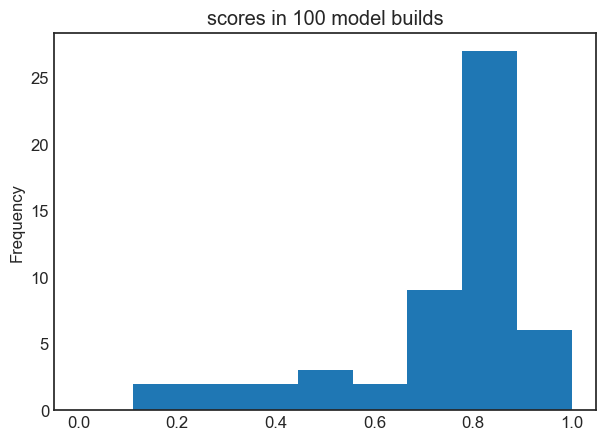

In [59]:
pd.Series(out).plot(kind='hist', title='scores in 100 model builds', bins=np.linspace(0, 1, 10));

## Improved Model

Question: What features and model improvements can we use?

In [60]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Improved Model

* If using linear regression: PCA to drop extra information.
* Better techniques for categorical encoding? (Ordinal vs Nominal?)
* Better techniques for imputation?
* Other models to try? (Tree-based?)

In [61]:
from sklearn.ensemble import RandomForestRegressor

cats = Pipeline([
    ('imp', SimpleImputer(strategy='constant', fill_value='NULL')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False)),
    ('pca', PCA(svd_solver='full', n_components=0.99))
])

ct = ColumnTransformer([
    ('catcols', cats, catcols),
    ('numcols', SimpleImputer(strategy='constant', fill_value=0), numcols)
])

pl = Pipeline([('feats', ct), ('reg', RandomForestRegressor())])

In [62]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.25)

In [63]:
pl.fit(X_tr, y_tr)
pl.score(X_ts, y_ts)

0.8608992285105899

In [64]:
preds = pl.predict(X_ts)
np.sqrt(np.mean(preds - y_ts)**2)

362.8287671232871

## Predicting Reviews

In [65]:
reviews = pd.read_json(open('data/reviews.json'), lines=True)

In [66]:
reviews

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1JZFGZEZVWQPY,B00002N674,"Carter H ""1amazonreviewer@gmail . com""","[4, 4]",Good USA company that stands behind their prod...,4,Great Hoses,1308614400,"06 21, 2011"
1,A32JCI4AK2JTTG,B00002N674,"Darryl Bennett ""Fuzzy342""","[0, 0]",This is a high quality 8 ply hose. I have had ...,5,Gilmour 10-58050 8-ply Flexogen Hose 5/8-Inch ...,1402272000,"06 9, 2014"
2,A3N0P5AAMP6XD2,B00002N674,H B,"[2, 3]",It's probably one of the best hoses I've ever ...,4,Very satisfied!,1336176000,"05 5, 2012"
3,A2QK7UNJ857YG,B00002N674,Jason,"[0, 0]",I probably should have bought something a bit ...,5,Very high quality,1373846400,"07 15, 2013"
4,AS0CYBAN6EM06,B00002N674,jimmy,"[1, 1]",I bought three of these 5/8-inch Flexogen hose...,5,Good Hoses,1375660800,"08 5, 2013"
...,...,...,...,...,...,...,...,...,...
13267,AT53ZTTO707MB,B00KS0F4FI,I Do The Speed Limit,"[1, 2]",Simple. Perfect. Plenty big enough. Durable...,5,Great pair of claws,1403827200,"06 27, 2014"
13268,AYB4ELCS5AM8P,B00KS0F4FI,"John B. Goode ""JBG""","[0, 0]",These claws are fantastic. They are made of ha...,5,Sharp...,1405123200,"07 12, 2014"
13269,AZMY6E8B52L2T,B00KS0F4FI,"JP ""J.P.""","[1, 3]",I really like theseOuddy Heat Resistant Meat C...,5,Really Helpful...,1405123200,"07 12, 2014"
13270,AEC90GPFKLAAW,B00KS0F4FI,"Lisa Kearns ""Lisa Kearns""","[0, 0]",I make pulled pork in the crock pot pretty oft...,5,Shreds meat perfectly!,1405468800,"07 16, 2014"


In [67]:
X = reviews['summary']
y = (reviews[['overall']] > 3).astype(int)

X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.25)

In [68]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

In [69]:
count_vec = CountVectorizer()

In [70]:
count_vec.fit(X_tr)

CountVectorizer()

In [71]:
vocab = sorted(count_vec.vocabulary_, key=lambda x:x[1])

pd.DataFrame(
    data=count_vec.transform(X).toarray(),
    columns=vocab
).head()

,1016,2013,10,7068,1061,c00322,600w,100,30,203cpbn,...,mysteriously,types,systemic,eyes,zzzzt,bzzzzzzzzzzz,azaleas,bz500333,rzu001,ez
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
pl = Pipeline([
    ('cv', CountVectorizer()), 
    ('clf', RandomForestClassifier(max_depth=8, n_estimators=7))
])

In [73]:
pl.fit(X_tr, y_tr)

Pipeline(steps=[('cv', CountVectorizer()),
                ('clf', RandomForestClassifier(max_depth=8, n_estimators=7))])

In [74]:
pl.score(X_ts, y_ts)

0.7778782399035563

In [75]:
clf = pl.named_steps['clf']

In [76]:
# What are the most important features?
pd.Series(
    data=clf.feature_importances_,
    index=vocab
).sort_values(ascending=False)

incorrectly    0.103444
length         0.057890
duty           0.037900
reluctantly    0.029408
humminbirds    0.028277
                 ...   
thumbs         0.000000
children       0.000000
theory         0.000000
when           0.000000
ez             0.000000
Length: 5282, dtype: float64

In [77]:
word = 'annoy'

reviews[reviews['summary'].str.lower().str.contains(word)]

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
815,AY3XPKRAMKKY7,B00008GS96,C. G. King,"[0, 0]",After an outbreak of pantry moths I was ready ...,5,Satisfying solution to annoying bugs,1303430400,"04 22, 2011"
1921,A2YV6F6DLENNTM,B000A0VOD2,Olivia Stabler,"[0, 0]",I have a squirrel problem 3 seasons out of the...,3,Got Rid of Annoying Squirrels...For a Couple Days,1345507200,"08 21, 2012"
5774,A3JPFWKS83R49V,B001B1KGCO,"Bryan Carey ""Bryan Carey""","[0, 0]",Fire ants are major pests here in the warmer c...,4,Terro 901 Ant Killer Wipes Out Annoying Pests,1372636800,"07 1, 2013"
6643,AJ8SVXL3SJN7T,B002EJLLEE,"Grider ""Just Horses""","[0, 0]","During gardening and canning season, we have a...",4,Really Works to Prevent Annoying Fruit Flies i...,1347494400,"09 13, 2012"
8155,A35ORHRXYF9HM1,B00472NNUQ,W. Bison,"[0, 0]","These scissors have plenty of uses, for sure, ...",4,A solid pair of scissors with a couple minor a...,1306281600,"05 25, 2011"
10302,A1TR1R2QKWRSRA,B008RGCA9I,"D. Chou ""THE Savvy Consumer""","[0, 0]",I cleared some drybrush and trees from the slo...,3,Did annoy the gophers to dig more holes elsewh...,1404345600,"07 3, 2014"


<AxesSubplot:ylabel='Frequency'>

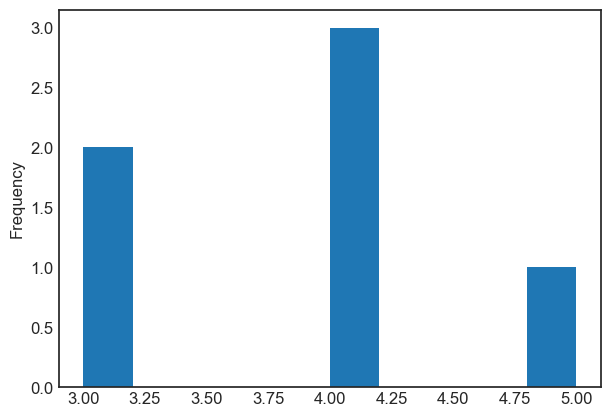

In [78]:
reviews[reviews['summary'].str.lower().str.contains(word)].overall.plot(kind='hist')

In [79]:
pl.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'cv', 'clf', 'cv__analyzer', 'cv__binary', 'cv__decode_error', 'cv__dtype', 'cv__encoding', 'cv__input', 'cv__lowercase', 'cv__max_df', 'cv__max_features', 'cv__min_df', 'cv__ngram_range', 'cv__preprocessor', 'cv__stop_words', 'cv__strip_accents', 'cv__token_pattern', 'cv__tokenizer', 'cv__vocabulary', 'clf__bootstrap', 'clf__ccp_alpha', 'clf__class_weight', 'clf__criterion', 'clf__max_depth', 'clf__max_features', 'clf__max_leaf_nodes', 'clf__max_samples', 'clf__min_impurity_decrease', 'clf__min_impurity_split', 'clf__min_samples_leaf', 'clf__min_samples_split', 'clf__min_weight_fraction_leaf', 'clf__n_estimators', 'clf__n_jobs', 'clf__oob_score', 'clf__random_state', 'clf__verbose', 'clf__warm_start'])

In [80]:
params = {
    'clf__max_depth': np.arange(2,500,20)
}

In [81]:
grids = GridSearchCV(pl, param_grid=params, cv=3, return_train_score=True)

In [82]:
grids.fit(X_tr, y_tr)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('cv', CountVectorizer()),
                                       ('clf',
                                        RandomForestClassifier(max_depth=8,
                                                               n_estimators=7))]),
             param_grid={'clf__max_depth': array([  2,  22,  42,  62,  82, 102, 122, 142, 162, 182, 202, 222, 242,
       262, 282, 302, 322, 342, 362, 382, 402, 422, 442, 462, 482])},
             return_train_score=True)

In [83]:
grids.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_clf__max_depth', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'mean_train_score', 'std_train_score'])

In [84]:
index = grids.param_grid['clf__max_depth']
test = grids.cv_results_['mean_test_score']
train = grids.cv_results_['mean_train_score']

<AxesSubplot:>

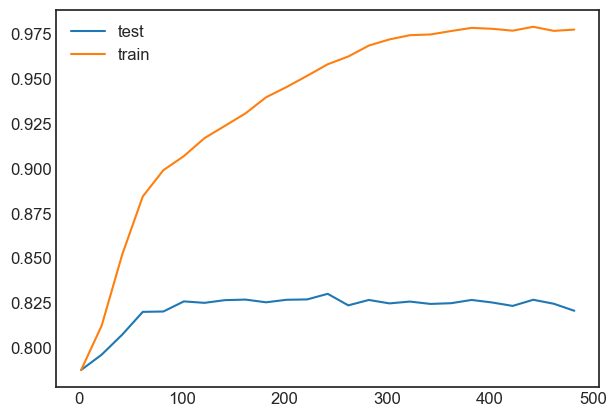

In [85]:
pd.DataFrame({'test': test, 'train': train}, index=index).plot()